In [12]:
# from itertools import *

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

from nltk.corpus import wordnet



%matplotlib inline
sns.set_style("darkgrid")



from scipy.sparse import csr_matrix


from wordcloud import WordCloud

from imblearn.under_sampling import ClusterCentroids

# from sklearn.grid_search import GridSearchCV

from imblearn.under_sampling import NearMiss, RandomUnderSampler
import logging



import nltk


from nltk import sent_tokenize, word_tokenize, pos_tag

from sklearn.svm import SVC

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from wordcloud import WordCloud 
import string
import matplotlib
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup  


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV , RepeatedKFold, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from sklearn.svm import SVC






In [2]:
df = pd.read_json('E:\Semester5\ML\Project\Electronics_5.json', orient='columns',lines=True)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664458 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1689188 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689188 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB
None


In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [5]:
df.isnull().sum()

reviewerID            0
asin                  0
reviewerName      24730
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
dtype: int64

In [6]:
df.describe()

,overall,unixReviewTime
count,1.689188e+06,1.689188e+06
mean,4.222779e+00,1.340571e+09
std,1.185632e+00,6.342451e+07
min,1.000000e+00,9.292320e+08
25%,4.000000e+00,1.318118e+09
50%,5.000000e+00,1.360800e+09
75%,5.000000e+00,1.385078e+09
max,5.000000e+00,1.406074e+09


C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_64132\471077069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='overall', palette='viridis')


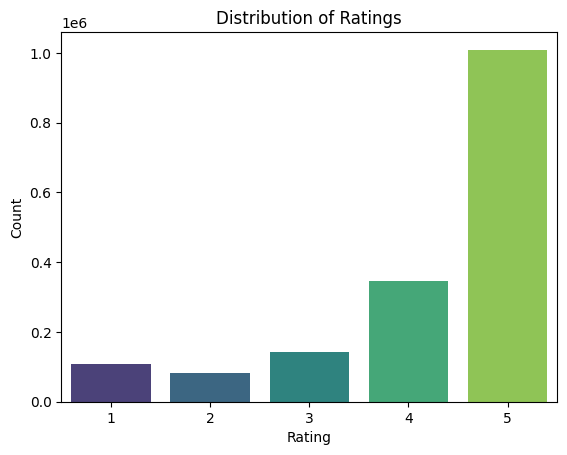

In [7]:
sns.countplot(data=df, x='overall', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


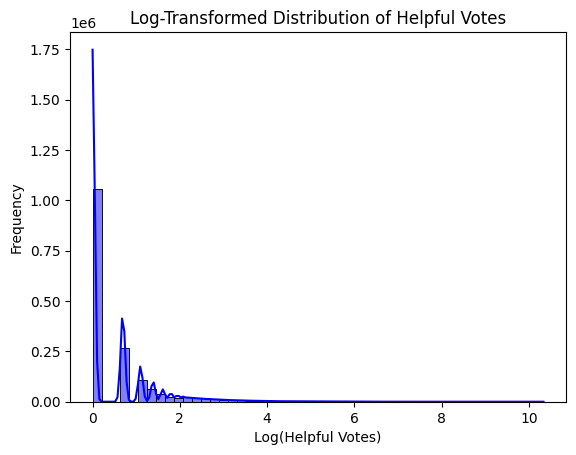

In [8]:
# Extract the 'helpful' votes
df['helpful_votes'] = df['helpful'].apply(lambda x: x[0] if isinstance(x, list) else 0)

# Add 1 to avoid log(0)
df['log_helpful_votes'] = np.log1p(df['helpful_votes'])

sns.histplot(df['log_helpful_votes'], bins=50, kde=True, color='blue')
plt.title('Log-Transformed Distribution of Helpful Votes')
plt.xlabel('Log(Helpful Votes)')
plt.ylabel('Frequency')
plt.show()

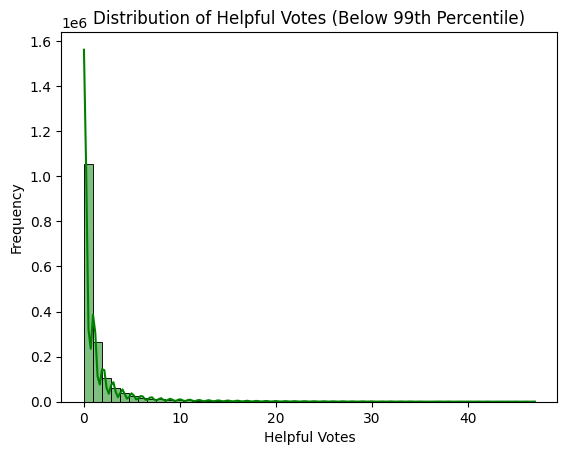

In [9]:
# Cap values at the 99th percentile
threshold = np.percentile(df['helpful_votes'], 99)
filtered_votes = df[df['helpful_votes'] <= threshold]

sns.histplot(filtered_votes['helpful_votes'], bins=50, kde=True, color='green')
plt.title('Distribution of Helpful Votes (Below 99th Percentile)')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.show()


Review Length

In [11]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_votes,log_helpful_votes
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013",0,0.000000
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010",12,2.564949
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010",43,3.784190
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010",9,2.302585
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011",0,0.000000


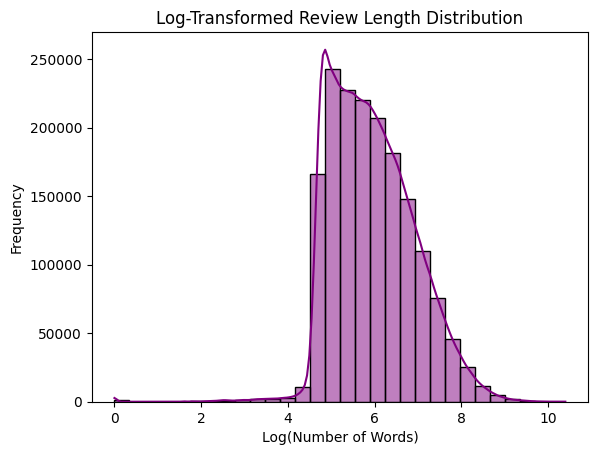

In [12]:
import numpy as np

# Create the 'review_length' column
df['review_length'] = df['reviewText'].apply(len)

# Apply log transformation to review lengths (add 1 to avoid log(0))
df['log_review_length'] = np.log1p(df['review_length'])

# Plot log-transformed review lengths
sns.histplot(df['log_review_length'], bins=30, kde=True, color='purple')
plt.title('Log-Transformed Review Length Distribution')
plt.xlabel('Log(Number of Words)')
plt.ylabel('Frequency')
plt.show()


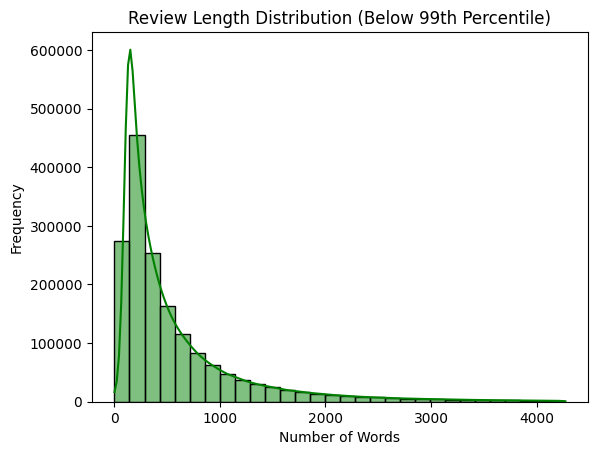

In [13]:
# Cap review lengths at the 99th percentile
threshold = np.percentile(df['review_length'], 99)
filtered_reviews = df[df['review_length'] <= threshold]

# Plot filtered review lengths
sns.histplot(filtered_reviews['review_length'], bins=30, kde=True, color='green')
plt.title('Review Length Distribution (Below 99th Percentile)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_64132\95111555.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='review_length_category', palette='coolwarm', order=['Short', 'Medium', 'Long'])


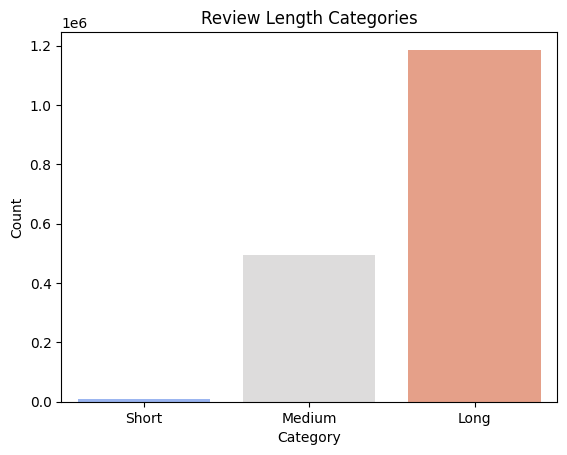

In [14]:
# Categorize reviews based on length
def categorize_review_length(length):
    if length <= 50:
        return 'Short'
    elif length <= 200:
        return 'Medium'
    else:
        return 'Long'

df['review_length_category'] = df['review_length'].apply(categorize_review_length)

# Plot review length categories
sns.countplot(data=df, x='review_length_category', palette='coolwarm', order=['Short', 'Medium', 'Long'])
plt.title('Review Length Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


Reviews over time

C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_64132\1766220522.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('reviewTime')['overall'].resample('M').count().plot(title='Number of Reviews Over Time', figsize=(12, 6))


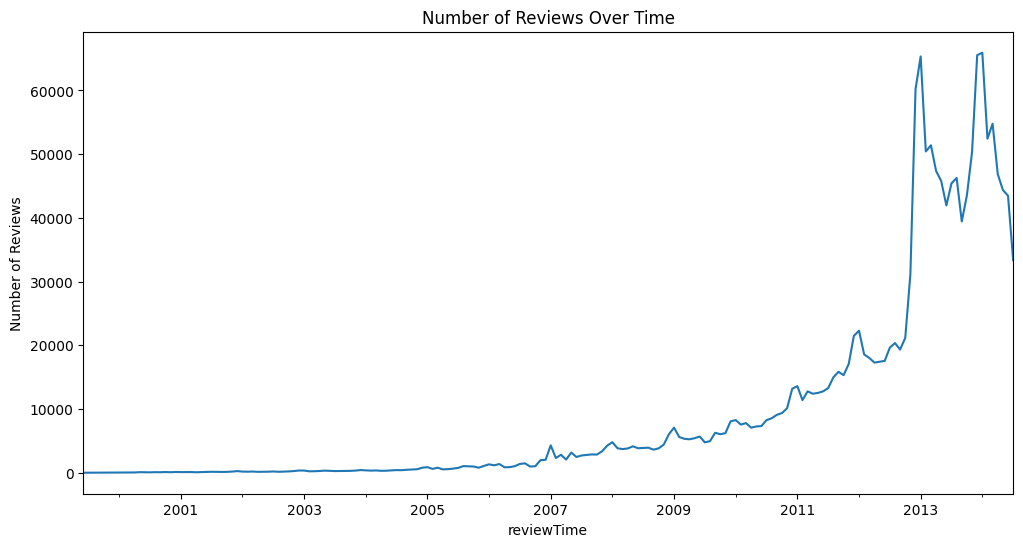

In [15]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Reviews over time
df.set_index('reviewTime')['overall'].resample('M').count().plot(title='Number of Reviews Over Time', figsize=(12, 6))
plt.ylabel('Number of Reviews')
plt.show()


New Column


In [16]:
# Calculate helpful ratio
df['helpful_ratio'] = df['helpful'].apply(
    lambda x: x[0] / x[1] if isinstance(x, list) and x[1] > 0 else 0
)

# Display a few rows to verify
print(df[['helpful', 'helpful_ratio']].head())


    helpful  helpful_ratio
0    [0, 0]       0.000000
1  [12, 15]       0.800000
2  [43, 45]       0.955556
3   [9, 10]       0.900000
4    [0, 0]       0.000000


In [17]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_votes,log_helpful_votes,review_length,log_review_length,review_length_category,helpful_ratio
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,2013-06-02,0,0.000000,805,6.692084,Long,0.000000
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,2010-11-25,12,2.564949,2175,7.685244,Long,0.800000
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,2010-09-09,43,3.784190,4607,8.435549,Long,0.955556
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,2010-11-24,9,2.302585,2246,7.717351,Long,0.900000
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,2011-09-29,0,0.000000,1076,6.981935,Long,0.000000


In [18]:
df = df.drop(columns=['unixReviewTime', 'helpful', 'reviewerName' , 'asin', 'reviewerID'])

In [21]:
df = df.drop(columns=['log_helpful_votes', 'log_review_length', 'review_length_category'])

In [115]:
# Create a new column 'reviewLength' with the length of each review
df['reviewLength'] = df['reviewText'].apply(len)

In [22]:
df.head()

,reviewText,overall,summary,reviewTime,helpful_votes,review_length,helpful_ratio
0,We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,2013-06-02,0,805,0.000000
1,"I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,2010-11-25,12,2175,0.800000
2,"Well, what can I say. I've had this unit in m...",3,1st impression,2010-09-09,43,4607,0.955556
3,"Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",2010-11-24,9,2246,0.900000
4,I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",2011-09-29,0,1076,0.000000


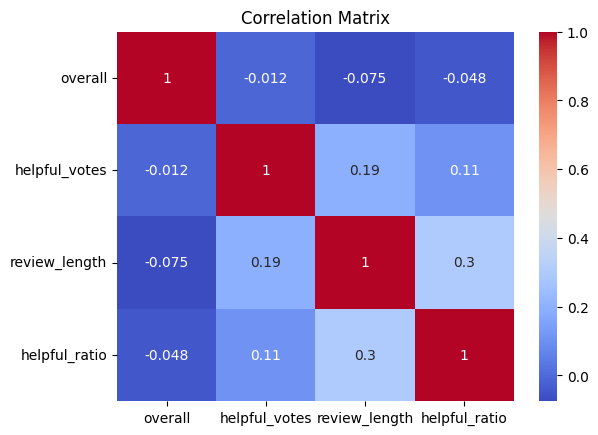

In [23]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Data Selection

In [24]:


# Define a function to compute a helpfulness score
def compute_helpfulness_score(helpful_ratio):
    if isinstance(helpful_ratio, (int, float)) and helpful_ratio >= 0:
        return helpful_ratio  # helpful_ratio is already a proportion, so we use it directly
    return 0  # Default score if helpful_ratio is invalid

# Define a function to compute a text quality score
def compute_text_quality(text):
    if isinstance(text, str):
        return len(text)  # Length of text as a proxy for quality
    return 0

# Define a function to select the top N reviews based on combined scores
def select_top_reviews(df, sentiment, n=20000):
    sentiment_df = df[df['Sentiment'] == sentiment]
    
    # Compute scores
    sentiment_df['helpfulness_score'] = sentiment_df['helpful_ratio'].apply(compute_helpfulness_score)
    sentiment_df['summary_length'] = sentiment_df['summary'].apply(compute_text_quality)
    sentiment_df['review_length'] = sentiment_df['reviewText'].apply(compute_text_quality)
    
    # Create a combined score (adjust weights as needed)
    sentiment_df['combined_score'] = (
        2 * sentiment_df['helpfulness_score'] + 
        0.1 * sentiment_df['summary_length'] + 
        0.1 * sentiment_df['review_length']
    )
    
    # Sort by the combined score and select the top N
    sentiment_df = sentiment_df.sort_values(by='combined_score', ascending=False).head(n)
    
    return sentiment_df

# Categorize reviews into Negative, Neutral, and Positive
df['Sentiment'] = df['overall'].apply(lambda x: 1 if x > 3 else (0 if x < 3 else 2))

# Select the top 20,000 reviews for each sentiment
dfnegative = select_top_reviews(df, sentiment=0, n=20000)  # Negative sentiment
# dfneutral = select_top_reviews(df, sentiment=2, n=20000)   # Neutral sentiment
dfpositive = select_top_reviews(df, sentiment=1, n=20000)  # Positive sentiment

# Combine datasets
df = pd.concat([dfnegative,  dfpositive])

df.head()


C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_64132\2122201526.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['helpfulness_score'] = sentiment_df['helpful_ratio'].apply(compute_helpfulness_score)
C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_64132\2122201526.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['summary_length'] = sentiment_df['summary'].apply(compute_text_quality)
C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_64132\2122201526.py:20: SettingWith

,reviewText,overall,summary,reviewTime,helpful_votes,review_length,helpful_ratio,Sentiment,helpfulness_score,summary_length,combined_score
1040782,UPDATE: I changed my review from 3 stars to 1 ...,1,Beware: You can't buy more glasses... But it ...,2011-10-05,40,29948,0.869565,0,0.869565,65,3003.03913
398618,I was asked to review the Sony XDR-F1HD by Jef...,2,iBiquity/IBOC HD (Hybrid digital) radio system...,2009-03-29,82,24091,0.773585,0,0.773585,117,2422.34717
742715,*Update 5*Since receiving the refurbished GO 7...,1,Go with another brand. Garmin and Magellan Cus...,2010-08-28,4,22028,1.000000,0,1.000000,115,2216.30000
1555104,Edit- 5/15These TVs have an amazing picture. N...,1,Buyer Beware! This model HAS ITS ISSUES! MAKE ...,2013-03-20,99,20411,0.430435,0,0.430435,86,2050.56087
1686981,PROSLess expensive than Microsoft OfficeCan op...,2,Past Perfect--aging interface and lesser capab...,2014-06-23,2,20114,1.000000,0,1.000000,114,2024.80000


C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_64132\471077069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='overall', palette='viridis')


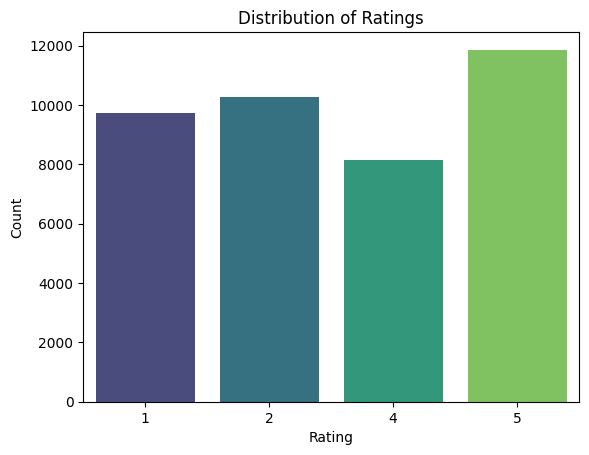

In [25]:
sns.countplot(data=df, x='overall', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [26]:
print("Negative Reviews Shape:", dfnegative.shape)
# print("Neutral Reviews Shape:", dfneutral.shape)
print("Positive Reviews Shape:", dfpositive.shape)


Negative Reviews Shape: (20000, 11)
Positive Reviews Shape: (20000, 11)


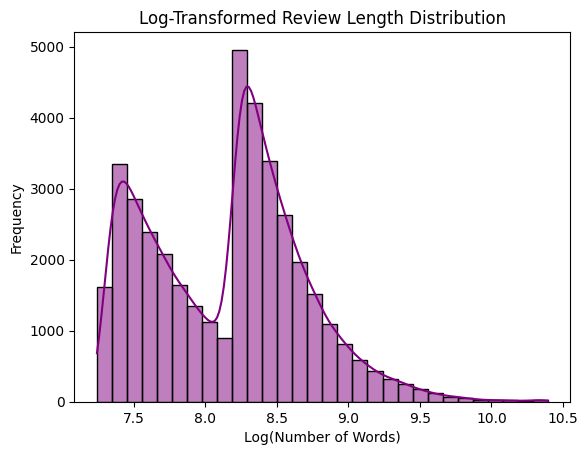

In [27]:
# Apply log transformation to review lengths (add 1 to avoid log(0))
df['log_review_length'] = np.log1p(df['review_length'])

# Plot log-transformed review lengths
sns.histplot(df['log_review_length'], bins=30, kde=True, color='purple')
plt.title('Log-Transformed Review Length Distribution')
plt.xlabel('Log(Number of Words)')
plt.ylabel('Frequency')
plt.show()


In [28]:
df.head()

,reviewText,overall,summary,reviewTime,helpful_votes,review_length,helpful_ratio,Sentiment,helpfulness_score,summary_length,combined_score,log_review_length
1040782,UPDATE: I changed my review from 3 stars to 1 ...,1,Beware: You can't buy more glasses... But it ...,2011-10-05,40,29948,0.869565,0,0.869565,65,3003.03913,10.307251
398618,I was asked to review the Sony XDR-F1HD by Jef...,2,iBiquity/IBOC HD (Hybrid digital) radio system...,2009-03-29,82,24091,0.773585,0,0.773585,117,2422.34717,10.089635
742715,*Update 5*Since receiving the refurbished GO 7...,1,Go with another brand. Garmin and Magellan Cus...,2010-08-28,4,22028,1.000000,0,1.000000,115,2216.30000,10.000115
1555104,Edit- 5/15These TVs have an amazing picture. N...,1,Buyer Beware! This model HAS ITS ISSUES! MAKE ...,2013-03-20,99,20411,0.430435,0,0.430435,86,2050.56087,9.923878
1686981,PROSLess expensive than Microsoft OfficeCan op...,2,Past Perfect--aging interface and lesser capab...,2014-06-23,2,20114,1.000000,0,1.000000,114,2024.80000,9.909221


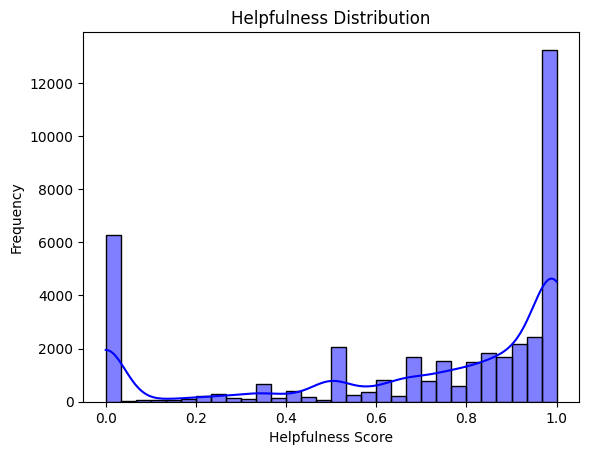

In [29]:

# Apply log transformation to review lengths (add 1 to avoid log(0))
# df['log_review_length'] = np.log1p(df['review_length'])

# Plot log-transformed review lengths
sns.histplot(df['helpfulness_score'], bins=30, kde=True, color='blue')
plt.title('Helpfulness Distribution')
plt.xlabel('Helpfulness Score')
plt.ylabel('Frequency')
plt.show()


C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_64132\1084041114.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


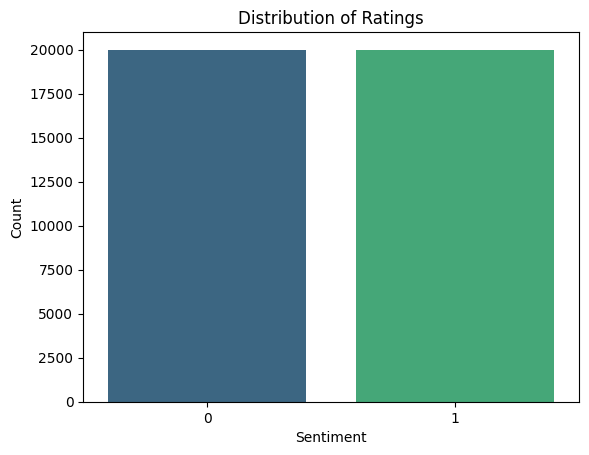

In [30]:
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Preprocessing

In [31]:
# Create a new DataFrame with selected columns
data = df[['reviewText']]

In [32]:



def cleanText(raw_text, remove_stopwords=True, stemming=False, split_text=False, ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    # 1. Lowercase text
    text = text.lower()
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # 3. Remove emails
    text = re.sub(r'\S+@\S+\.\S+', '', text)
    # 4. Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # 5. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 

    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        stops.remove('not')
        stops.remove('no')
        words = [w for w in words if not w in stops]
    if stemming==True: # stemming
        stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [33]:
# Clean reviewText and summary
data['cleaned_reviewText'] = data['reviewText'].apply(lambda x: cleanText(x, remove_stopwords=True, stemming=True))
# data['cleaned_summary'] = data['summary'].apply(lambda x: cleanText(x, remove_stopwords=True, stemming=True))



C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_64132\1019627459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_reviewText'] = data['reviewText'].apply(lambda x: cleanText(x, remove_stopwords=True, stemming=True))


In [128]:
data.head()

,reviewText,summary,reviewLength,Sentiment,summary_length,cleaned_reviewText,cleaned_summary,review_polarity,review_subjectivity,summary_polarity,summary_subjectivity
1040782,UPDATE: I changed my review from 3 stars to 1 ...,Beware: You can't buy more glasses... But it ...,29948,0,65,updat chang review star year fair light usag m...,bewar cant buy glass work mac,0.120715,0.458643,0.00,0.000000
398618,I was asked to review the Sony XDR-F1HD by Jef...,iBiquity/IBOC HD (Hybrid digital) radio system...,24091,0,117,ask review soni xdrf hd jeff nelson public aff...,ibiquityiboc hd hybrid digit radio system eval...,0.109717,0.417945,0.00,0.000000
742715,*Update 5*Since receiving the refurbished GO 7...,Go with another brand. Garmin and Magellan Cus...,22028,0,115,updat sinc receiv refurbish go tm live here la...,go anoth brand garmin magellan custom servic u...,0.157839,0.385811,0.50,0.500000
1555104,Edit- 5/15These TVs have an amazing picture. N...,Buyer Beware! This model HAS ITS ISSUES! MAKE ...,20411,0,86,edit tvs amaz pictur no doubt look bad review ...,buyer bewar model issu make sure buy extend wa...,0.064855,0.442782,0.50,0.888889
1686981,PROSLess expensive than Microsoft OfficeCan op...,Past Perfect--aging interface and lesser capab...,20114,0,114,prosless expens microsoft officecan open popul...,past perfectag interfac lesser capabl make sui...,0.188084,0.447816,-0.25,0.583333


In [34]:
X = data[['cleaned_reviewText']]


In [35]:
# Step 1: Create the TF-IDF vectorizer for cleaned_reviewText and cleaned_summary
vectorizer_reviewText = TfidfVectorizer(
    min_df=5,  # Minimum document frequency of 5
    ngram_range=(1, 2),  # Include unigrams and bigrams
    strip_accents='unicode',
    binary=True,  # Binary representation (1 or 0) instead of frequency
    max_features=5000  # Limit to top 5000 features
)

# vectorizer_summary = TfidfVectorizer(
#     min_df=5,  # Minimum document frequency of 5
#     ngram_range=(1, 2),  # Include unigrams and bigrams
#     strip_accents='unicode',
#     binary=True,  # Binary representation (1 or 0) instead of frequency
#     max_features=5000  # Limit to top 5000 features
# )

# Step 2: Fit and transform the cleaned_reviewText and cleaned_summary
X_reviewText = vectorizer_reviewText.fit_transform(X['cleaned_reviewText'])
# X_summary = vectorizer_summary.fit_transform(X['cleaned_summary'])




In [36]:


# Step 3: Combine the TF-IDF matrices from cleaned_reviewText and cleaned_summary
X_combined_text = hstack([X_reviewText])

# # Step 4: Extract numerical features
# numerical_features = X[['review_polarity', 'review_subjectivity', 'reviewLength', 'summary_length']].values

# Convert the numerical features into a sparse matrix (to keep it compatible with the TF-IDF matrix)

# numerical_sparse = csr_matrix(numerical_features)

# Step 5: Combine the TF-IDF matrix and numerical features
X_final = hstack([X_combined_text])

# Check the shape of the final feature matrix
print(f"Shape of the final combined feature matrix: {X_final.shape}")

Shape of the final combined feature matrix: (40000, 5000)


In [ ]:

# Step 1: Prepare the data
X, y = shuffle(X_final, df['Sentiment'], random_state=42)

# Ensure balanced split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 2: Train model incrementally to track training and testing accuracy
training_accuracies = []
testing_accuracies = []
subset_sizes = np.linspace(0.1, 1.0, 10)  # Incrementally use more training data

for subset_size in subset_sizes:
    subset_rows = int(X_train.shape[0] * subset_size)
    subset_X_train = X_train[:subset_rows]
    subset_y_train = y_train[:subset_rows]

    log_reg = LogisticRegression(solver='lbfgs', max_iter=500, random_state=42)
    log_reg.fit(subset_X_train, subset_y_train)

    # Compute training and testing accuracy
    train_accuracy = accuracy_score(subset_y_train, log_reg.predict(subset_X_train))
    test_accuracy = accuracy_score(y_test, log_reg.predict(X_test))

    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

# Final Model for Metrics and Confusion Matrix
log_reg_final = LogisticRegression(solver='lbfgs', max_iter=500, random_state=42)
log_reg_final.fit(X_train, y_train)

# Predictions
y_test_pred = log_reg_final.predict(X_test)

# Step 3: Classification Metrics
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred))




Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6000
           1       0.93      0.95      0.94      6000

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000



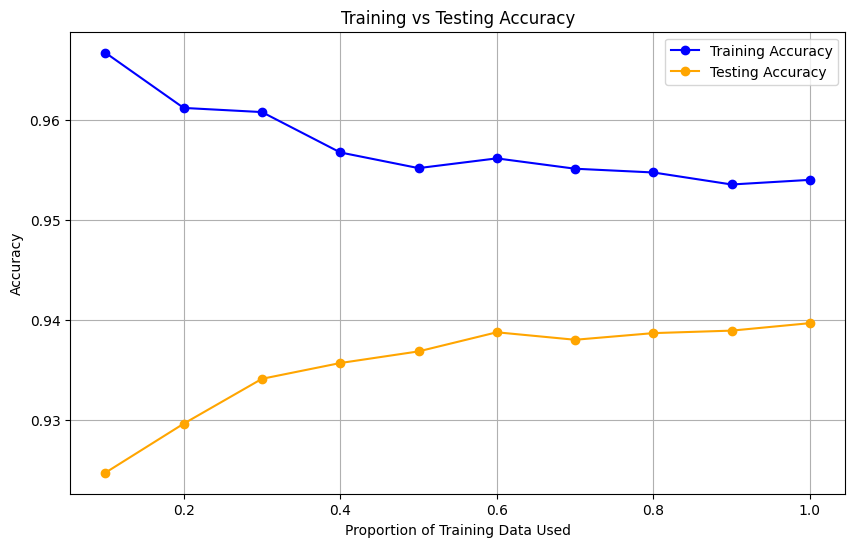

In [52]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Step 4: Plot Training vs Testing Accuracy
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, training_accuracies, label="Training Accuracy", marker='o', color='blue')
plt.plot(subset_sizes, testing_accuracies, label="Testing Accuracy", marker='o', color='orange')
plt.title("Training vs Testing Accuracy")
plt.xlabel("Proportion of Training Data Used")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()



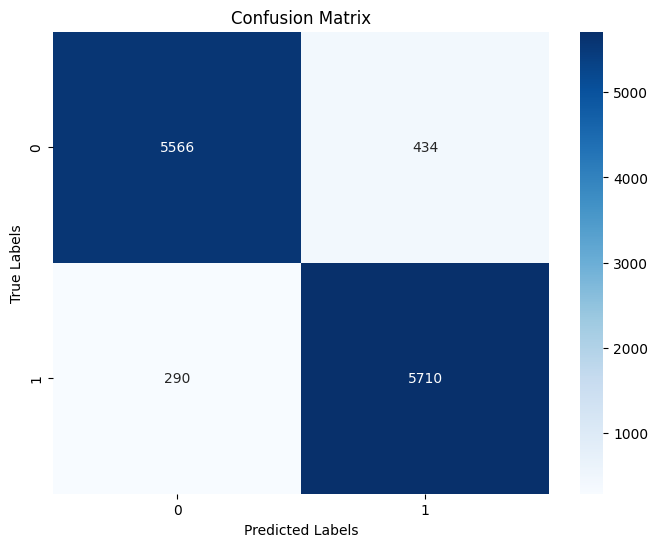

In [53]:
# Step 5: Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg_final.classes_, yticklabels=log_reg_final.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

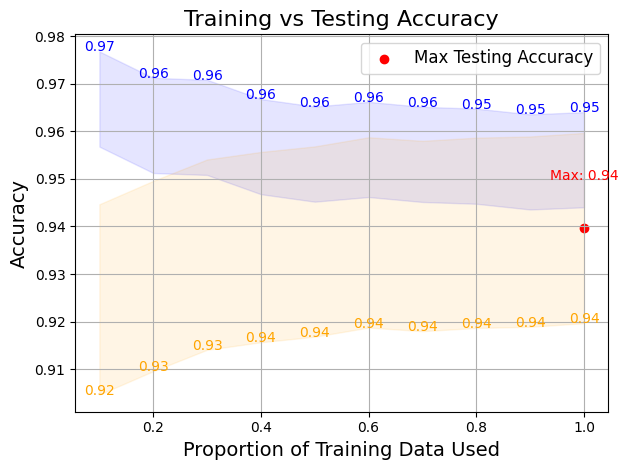

In [54]:
# Add error bands (example; replace with actual standard deviation data if available)
training_accuracies_std = [0.01] * len(subset_sizes)  # Example standard deviation
testing_accuracies_std = [0.02] * len(subset_sizes)  # Example standard deviation
plt.fill_between(subset_sizes, 
                 np.array(training_accuracies) - training_accuracies_std,
                 np.array(training_accuracies) + training_accuracies_std, 
                 color='blue', alpha=0.1)
plt.fill_between(subset_sizes, 
                 np.array(testing_accuracies) - testing_accuracies_std,
                 np.array(testing_accuracies) + testing_accuracies_std, 
                 color='orange', alpha=0.1)

# Annotate points
for i, size in enumerate(subset_sizes):
    plt.text(size, training_accuracies[i] + 0.01, f"{training_accuracies[i]:.2f}", color='blue', ha='center')
    plt.text(size, testing_accuracies[i] - 0.02, f"{testing_accuracies[i]:.2f}", color='orange', ha='center')

# Highlight maximum testing accuracy
max_test_acc_idx = np.argmax(testing_accuracies)
plt.scatter([subset_sizes[max_test_acc_idx]], [testing_accuracies[max_test_acc_idx]], color='red', label='Max Testing Accuracy')
plt.text(subset_sizes[max_test_acc_idx], testing_accuracies[max_test_acc_idx] + 0.01, 
         f"Max: {testing_accuracies[max_test_acc_idx]:.2f}", color='red', ha='center')

# Add labels, title, and legend
plt.title("Training vs Testing Accuracy", fontsize=16)
plt.xlabel("Proportion of Training Data Used", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\Abdul Rehman\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 1, 'max_iter': 100, 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.9379

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6000
           1       0.93      0.95      0.94      6000

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000



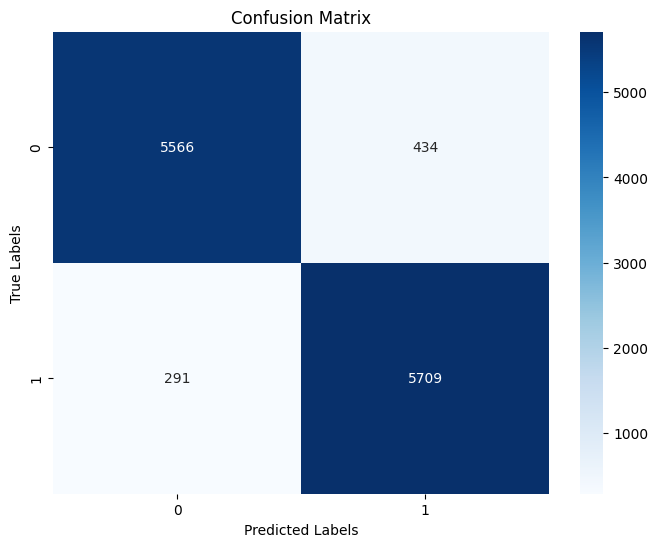

In [55]:


# Step 1: Define the parameter grid
param_grid = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (smaller values = stronger regularization)
    'max_iter': [100, 200, 500],   # Maximum number of iterations
}

# Step 2: Initialize Logistic Regression and GridSearchCV
log_reg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,                # 5-fold cross-validation
    verbose=1,           # Show progress
    n_jobs=-1            # Use all available cores
)

# Step 3: Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Step 4: Display Best Parameters and Best Score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Step 5: Evaluate on Test Set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Classification Metrics
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


To save the model and TF-IDF

In [ ]:
import joblib

# Save the Logistic Regression model and TF-IDF vectorizer
model_filename = "SentimentalAnalysisPrrojectModel.joblib"
tfidf_filename = "SentimentalAnalysisPrrojectVectorizervectorReviewText.joblib"

# Assuming `log_reg_final` is your trained model and `tfidf` is the TfidfVectorizer
joblib.dump(log_reg_final, model_filename)
joblib.dump(vectorizer_reviewText, tfidf_filename)

print(f"Model saved as {model_filename}")
print(f"TF-IDF Vectorizer saved as {tfidf_filename}")


SVM

In [ ]:


# Step 1: Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['linear', 'rbf']       # Kernel type
}

# Step 2: Initialize SVC and GridSearchCV
svc = SVC(random_state=42)
grid_search_svm = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_svm,
    scoring='accuracy',  # Metric to optimize
    cv=5,                # 5-fold cross-validation
    verbose=1,           # Show progress
    n_jobs=-1            # Use all available cores
)

# Step 3: Fit the GridSearchCV for SVM
grid_search_svm.fit(X_train, y_train)

# Step 4: Display Best Parameters and Best Score
print(f"Best Parameters (SVM): {grid_search_svm.best_params_}")
print(f"Best Cross-Validation Accuracy (SVM): {grid_search_svm.best_score_:.4f}")

# Step 5: Evaluate the Best Model on the Test Set
best_svm_model = grid_search_svm.best_estimator_
y_test_pred_svm = best_svm_model.predict(X_test)

# Classification Metrics
print("\nClassification Report (Testing Data - SVM):")
print(classification_report(y_test, y_test_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_test_pred_svm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=best_svm_model.classes_, yticklabels=best_svm_model.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

# Step 1: Prepare the data
X, y = shuffle(X_final, df['Sentiment'], random_state=42)

# Ensure balanced split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 2: Train model incrementally to track training and testing accuracy
training_accuracies = []
testing_accuracies = []
subset_sizes = np.linspace(0.1, 1.0, 10)  # Incrementally use more training data

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=500, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'MNB': MultinomialNB(),
    'SVM': SVC(random_state=42)
}

# Initialize accuracies dictionary to track each model
all_training_accuracies = {key: [] for key in classifiers}
all_testing_accuracies = {key: [] for key in classifiers}

for subset_size in subset_sizes:
    subset_rows = int(X_train.shape[0] * subset_size)
    subset_X_train = X_train[:subset_rows]
    subset_y_train = y_train[:subset_rows]
    
    for clf_name, clf in classifiers.items():
        # Train the classifier
        clf.fit(subset_X_train, subset_y_train)
        
        # Compute training and testing accuracy
        train_accuracy = accuracy_score(subset_y_train, clf.predict(subset_X_train))
        test_accuracy = accuracy_score(y_test, clf.predict(X_test))
        
        all_training_accuracies[clf_name].append(train_accuracy)
        all_testing_accuracies[clf_name].append(test_accuracy)

# Final Models for Metrics and Confusion Matrix
final_classifiers = {name: clf.fit(X_train, y_train) for name, clf in classifiers.items()}

# Predictions and Metrics
print("\nClassification Report (Testing Data):")
for clf_name, clf in final_classifiers.items():
    y_test_pred = clf.predict(X_test)
    print(f"\n{clf_name} Classification Report:")
    print(classification_report(y_test, y_test_pred))


C:\Users\Abdul Rehman\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Abdul Rehman\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Abdul Rehman\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Abdul Rehman\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and w

In [1]:
import dill
import joblib


with open('SentimentalAnalysisPrrojectModelFinal.dill', 'rb') as f:
    model = dill.load(f)

vectorizer_reviewText = joblib.load('SentimentalAnalysisPrrojectVectorizervectorReviewText.joblib') 

# Transform the text data using the saved TF-IDF vectorizer
review_sample_scaled = "TThe product is really  expensive"
X_reviewText = [review_sample_scaled]

# Transform the text using the vectorizer
X_reviewText_scaled = vectorizer_reviewText.transform(X_reviewText)

#  Make predictions using the trained model
y_pred_new = model.predict(review_sample_scaled)

# Output the result (the predicted sentiment)
print(f"Predicted Sentiment: {y_pred_new}")

# Display sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Positive'}
print(f"The given sentence is: {sentiment_labels.get(y_pred_new, 'Unknown')}")

Predicted Sentiment: 0
The given sentence is: Negative


Load the saved model and vectorizer

In [22]:
import dill
import joblib


with open('SentimentalAnalysisPrrojectModelFinal.dill', 'rb') as f:
    model = dill.load(f)

vectorizer_reviewText = joblib.load('SentimentalAnalysisPrrojectVectorizervectorReviewText.joblib') 

Transform the text data using the saved TF-IDF vectorizer

In [23]:
# Transform the text data using the saved TF-IDF vectorizer
review_sample_scaled = "TThe product is really  expensive"
X_reviewText = [review_sample_scaled]

Transform the text using the vectorizer

In [24]:
# Transform the text using the vectorizer
X_reviewText_scaled = vectorizer_reviewText.transform(X_reviewText)

 Make predictions using the trained model

In [25]:
#  Make predictions using the trained model
y_pred_new = model.predict(review_sample_scaled)

Output the result (the predicted sentiment)

In [26]:
# Output the result (the predicted sentiment)
print(f"Predicted Sentiment: {y_pred_new}")

# Display sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Positive'}
print(f"The given sentence is: {sentiment_labels.get(y_pred_new, 'Unknown')}")

Predicted Sentiment: 0
The given sentence is: Negative
